# Housing Price with Keras Regression 

We will be using data from a Kaggle data set, housesalesprediction. We will be doing some feature engineering and explanatory data analysis. Then we will be using a deep learning method in keras.

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('kc_house_data.csv')

# Exploratory Data Analysis

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [6]:
df.describe(include='object').transpose()

,count,unique,top,freq
date,21597,372,6/23/2014,142


In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

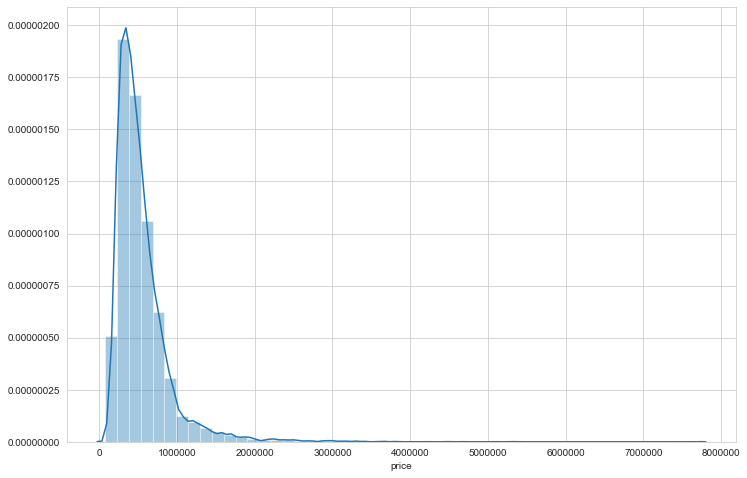

In [9]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

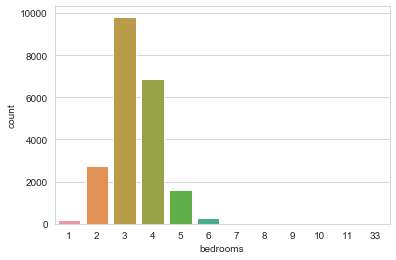

In [10]:
sns.countplot(df['bedrooms'])

Most the house have 2 to 5 bedrooms.

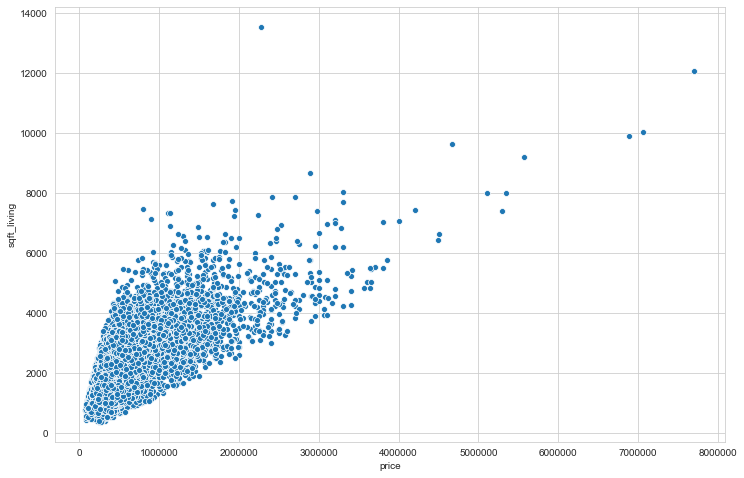

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

We can see living space is highly correlated to price.

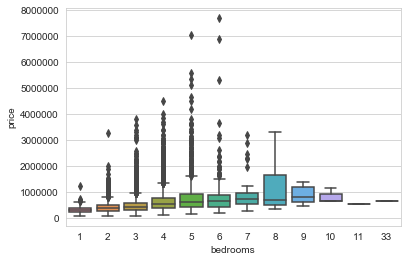

In [12]:
sns.boxplot(x='bedrooms',y='price',data=df)

This shows the distribution of prices per bedroom. 

### Geographical Properties

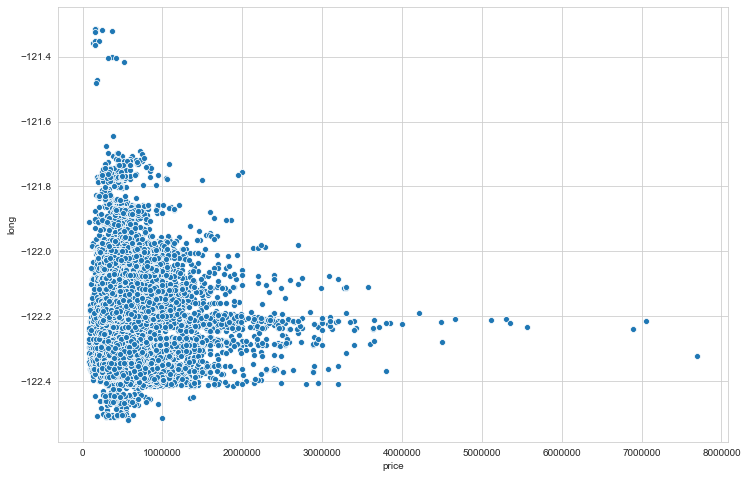

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

As certain point of longtitude (-122) are expensive houses.

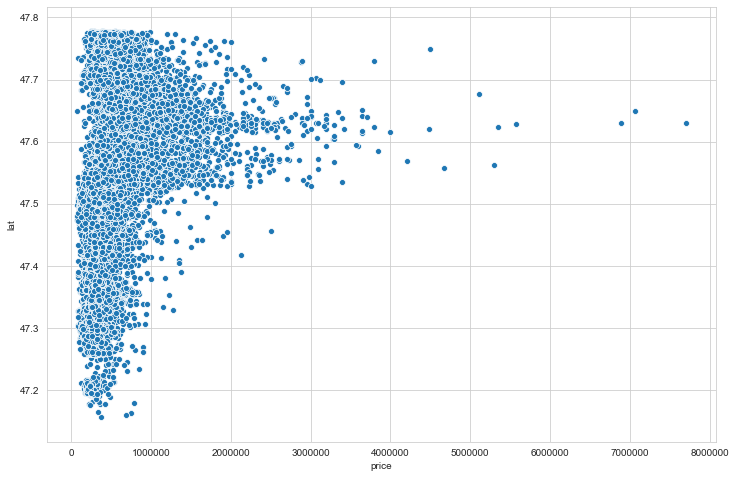

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

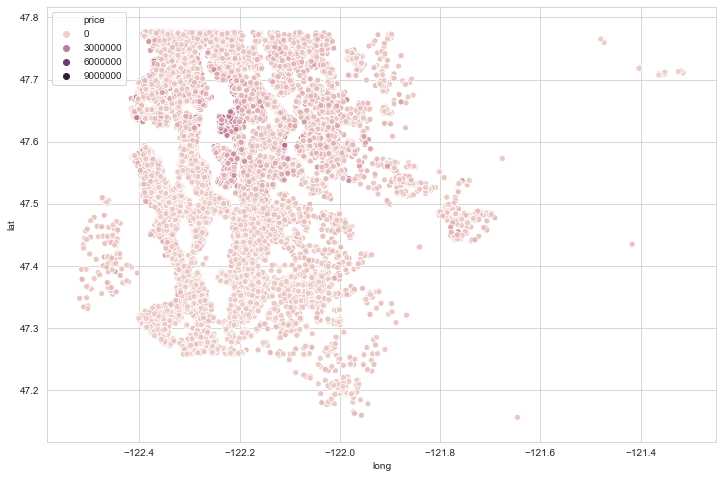

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

Because of the really high value outliers, we are not able to see the hot spots clearly. We will remove these outliers. 

In [16]:
len(df)*(0.01) # we will get the bottom 99% houses

215.97

In [17]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

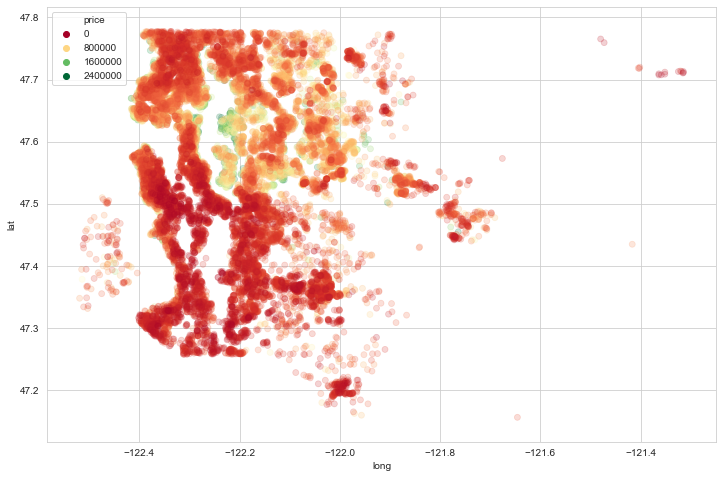

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

By comparing the above with the actual map of Seatle, it shows houses next to the water are more expensive.

### Other Features

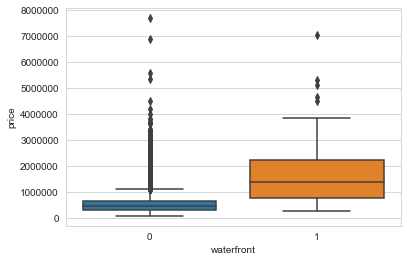

In [19]:
sns.boxplot(x='waterfront',y='price',data=df)

## Working with Feature Data

In [20]:
df = df.drop('id',axis=1)

In [21]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Feature Engineering from Date

In [22]:
df['date'] = pd.to_datetime(df['date'])

In [23]:
df['month'] = df['date'].apply(lambda date:date.month)

In [24]:
df['year'] = df['date'].apply(lambda date:date.year)

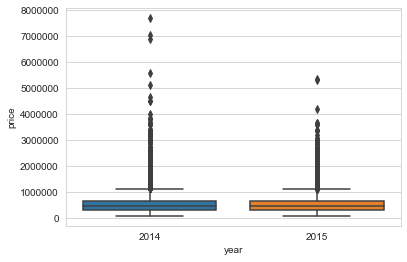

In [25]:
sns.boxplot(x='year',y='price',data=df)

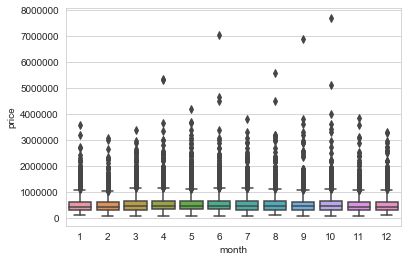

In [26]:
sns.boxplot(x='month',y='price',data=df)

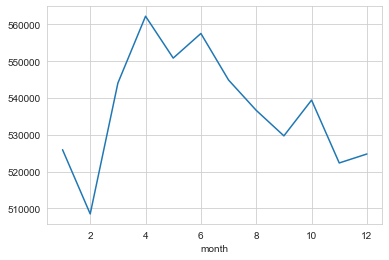

In [27]:
df.groupby('month').mean()['price'].plot()

Not a huge difference, but some patterns.

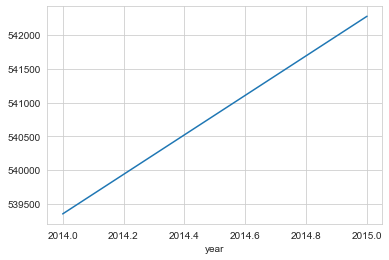

In [28]:
df.groupby('year').mean()['price'].plot()

In [29]:
df = df.drop('date',axis=1)

In [30]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [31]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [32]:
df['zipcode'].nunique()

70

70 categories is too much, let's drop it.

In [33]:
df = df.drop('zipcode',axis=1)

In [34]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [35]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

Most of them are 0, they are not renovated. It makes more sense to make it as renovated or non-renovated. Or we can keep it as it is because the more recent the renovation, the higher the price.

In [36]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

It is the similar situation as above.

## Scaling and Train Test Split

In [37]:
X = df.drop('price',axis=1)
y = df['price']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()

In [42]:
X_train= scaler.fit_transform(X_train)

In [43]:
X_test = scaler.transform(X_test)

In [44]:
X_train.shape

(15117, 19)

In [45]:
X_test.shape

(6480, 19)

## Creating a Model with NN 

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

We have 19 incoming features, so it is good idea to have 19 units (neurons).

In [47]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

We are also going to pass in the validation data. It means after each epoch of training on the training data we'll quickly run the test data and check our loss on the test data. So that way we can keep a tracking of how well performing not just on training data but also on our test data. This test data will not actually affect the weights or biases of our network.

Because it is a large dataset we're going to feed in our data in batches (batch_size). It's commen to do batch sizes in powers of two. The smaller the batch size, the longer the traing is going to take but the less likely you're going to overfit to your data because you're not passing in your entire training set at once.

Early stopping to try to choose the correct number of epochs to train for, and also the number of layers to train

Tensorflow may complain if you don't pass in a numeric array because keras can't work with pandas' series or dataframe that well.

## Training the Model

In [48]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 3ms/step - loss: 430240956416.0000 - val_loss: 418920366080.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 429201817600.0000 - val_loss: 415242715136.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 414305091584.0000 - val_loss: 380926263296.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 340079247360.0000 - val_loss: 260977672192.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 191408422912.0000 - val_loss: 119879090176.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 106023534592.0000 - val_loss: 95358320640.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 97695154176.0000 - val_loss: 93822820352.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 96112795648.0000 - val_loss: 92302745600.0000
Epoch 9/400
119/119 [

Epoch 68/400
119/119 [==============================] - 0s 2ms/step - loss: 38427992064.0000 - val_loss: 37126873088.0000
Epoch 69/400
119/119 [==============================] - 0s 2ms/step - loss: 38212874240.0000 - val_loss: 37031272448.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 38038380544.0000 - val_loss: 36739510272.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 37880102912.0000 - val_loss: 36504621056.0000
Epoch 72/400
119/119 [==============================] - 0s 2ms/step - loss: 37650259968.0000 - val_loss: 36323205120.0000
Epoch 73/400
119/119 [==============================] - 0s 2ms/step - loss: 37539188736.0000 - val_loss: 36153872384.0000
Epoch 74/400
119/119 [==============================] - 0s 2ms/step - loss: 37315551232.0000 - val_loss: 35986898944.0000
Epoch 75/400
119/119 [==============================] - 0s 2ms/step - loss: 37158309888.0000 - val_loss: 35840217088.0000
Epoch 76/400
119/119 [==

Epoch 135/400
119/119 [==============================] - 0s 3ms/step - loss: 32925118464.0000 - val_loss: 31389138944.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 32912990208.0000 - val_loss: 31314264064.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 32867026944.0000 - val_loss: 31281698816.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 32851017728.0000 - val_loss: 31252359168.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 32787662848.0000 - val_loss: 31214954496.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 32787484672.0000 - val_loss: 31162417152.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 32725534720.0000 - val_loss: 31205584896.0000
Epoch 142/400
119/119 [==============================] - 0s 2ms/step - loss: 32756123648.0000 - val_loss: 31139172352.0000
Epoch 143/400
11

119/119 [==============================] - 0s 2ms/step - loss: 31566833664.0000 - val_loss: 29689276416.0000
Epoch 202/400
119/119 [==============================] - 0s 1ms/step - loss: 31525681152.0000 - val_loss: 29626546176.0000
Epoch 203/400
119/119 [==============================] - 0s 2ms/step - loss: 31495581696.0000 - val_loss: 29626624000.0000
Epoch 204/400
119/119 [==============================] - 0s 2ms/step - loss: 31469971456.0000 - val_loss: 29599078400.0000
Epoch 205/400
119/119 [==============================] - 0s 2ms/step - loss: 31450699776.0000 - val_loss: 29601671168.0000
Epoch 206/400
119/119 [==============================] - 0s 2ms/step - loss: 31467556864.0000 - val_loss: 29546031104.0000
Epoch 207/400
119/119 [==============================] - 0s 2ms/step - loss: 31395975168.0000 - val_loss: 29566658560.0000
Epoch 208/400
119/119 [==============================] - 0s 2ms/step - loss: 31441829888.0000 - val_loss: 29534083072.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30775085056.0000 - val_loss: 28622770176.0000
Epoch 268/400
119/119 [==============================] - 0s 1ms/step - loss: 30772463616.0000 - val_loss: 28647096320.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 30681968640.0000 - val_loss: 28663730176.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 30661511168.0000 - val_loss: 28656945152.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 30690830336.0000 - val_loss: 28586196992.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 30636912640.0000 - val_loss: 28589500416.0000
Epoch 273/400
119/119 [==============================] - 0s 3ms/step - loss: 30659360768.0000 - val_loss: 28608243712.0000
Epoch 274/400
119/119 [==============================] - 0s 3ms/step - loss: 30651219968.0000 - val_loss: 28557293568.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30083891200.0000 - val_loss: 27901652992.0000
Epoch 334/400
119/119 [==============================] - 0s 1ms/step - loss: 30075174912.0000 - val_loss: 27867312128.0000
Epoch 335/400
119/119 [==============================] - 0s 1ms/step - loss: 30093391872.0000 - val_loss: 27832918016.0000
Epoch 336/400
119/119 [==============================] - 0s 2ms/step - loss: 30054854656.0000 - val_loss: 27847856128.0000
Epoch 337/400
119/119 [==============================] - 0s 2ms/step - loss: 30066237440.0000 - val_loss: 27823337472.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 30062358528.0000 - val_loss: 27843405824.0000
Epoch 339/400
119/119 [==============================] - 0s 2ms/step - loss: 30048061440.0000 - val_loss: 27793733632.0000
Epoch 340/400
119/119 [==============================] - 0s 2ms/step - loss: 30035062784.0000 - val_loss: 27783219200.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 29590431744.0000 - val_loss: 27251619840.0000
Epoch 400/400
119/119 [==============================] - 0s 3ms/step - loss: 29490229248.0000 - val_loss: 27127902208.0000


In [47]:
losses = pd.DataFrame(model.history.history)

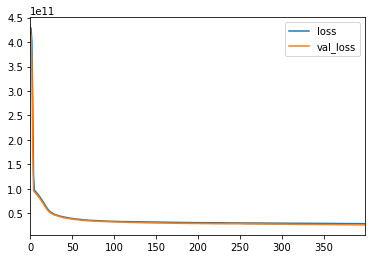

In [48]:
losses.plot()

To see if we don't have overfitting. The above plot shows we don't as the loss of training set and test set are the same. If the validation loss was increasing it means the model was overfitted.

# Evaluation on Test Data

In [51]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [52]:
predictions = model.predict(X_test)

In [53]:
mean_absolute_error(y_test,predictions)

101715.83612075617

In [54]:
np.sqrt(mean_squared_error(y_test,predictions))

164705.5079531783

In [49]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

The mean price is around 540000 and our MSRE is around 100000. It is off around 20% which is not very good.

In [55]:
explained_variance_score(y_test,predictions)

0.7954411995711177

We can use explained variance score to get a deeper understading of our evaluation. It tells us how much variance is being explained by our model.

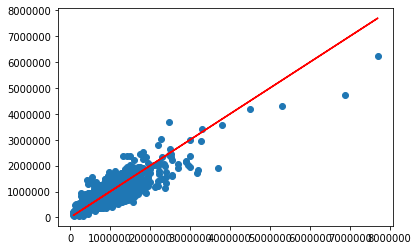

In [57]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

It shows the expensive houses were actually not good at predicting the price but we have a good prediction for not expensive houses. To improve the model, one way is to run the model on the bottom 99% of the houses.

In [58]:
errors = y_test.values.reshape(6480, 1) - predictions

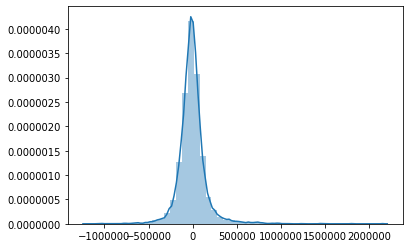

In [59]:
sns.distplot(errors)